In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [4]:
df.drop(columns=['day','month','year'],inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [6]:
df['Classes'].value_counts()

fire             156
not fire          82
not fire           2
not fire           2
Name: Classes, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [9]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [10]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0


In [11]:
y.head()

0    0.2
1    0.2
2    0.1
3    1.0
4    0.9
Name: FWI, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [13]:
x_train.shape,x_test.shape

((181, 10), (61, 10))

<Axes: >

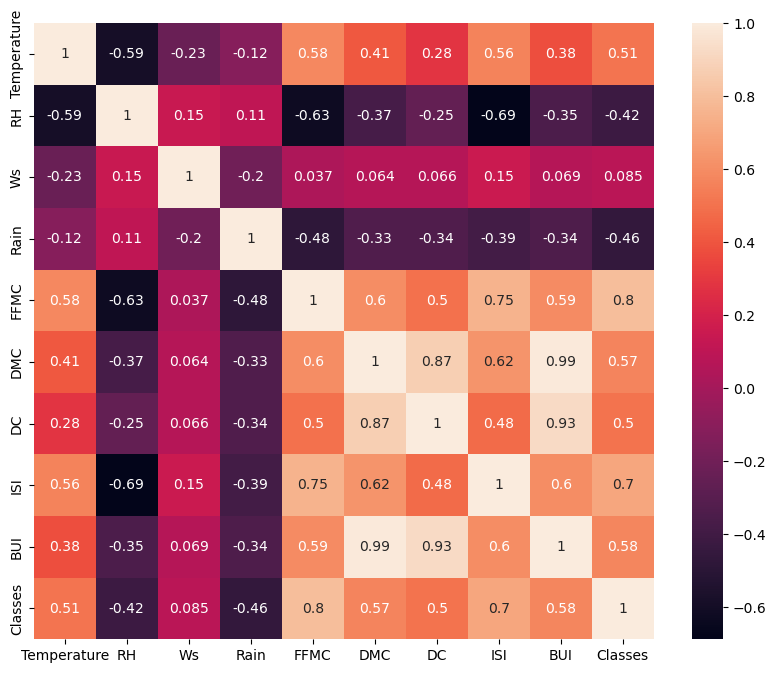

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr(),annot=True)

In [15]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features=correlation(x_train,0.85)

In [17]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((181, 8), (61, 8))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [19]:
x_train_scaled

array([[-0.54642782,  0.35762617,  0.06492179, ..., -0.87568692,
        -0.40874903,  0.76662853],
       [-0.28268532, -0.08228874, -0.31413768, ..., -0.67918391,
        -0.16484714,  0.76662853],
       [-1.07391281, -0.96211856, -2.58849445, ...,  0.62559612,
        -0.63232577,  0.76662853],
       ...,
       [-1.3376553 ,  0.67185111,  1.58115963, ..., -1.10363042,
        -0.77460188, -1.30441272],
       [ 0.77228465, -0.01944375,  0.44398125, ...,  0.5391348 ,
         0.48555792,  0.76662853],
       [-0.54642782,  0.98607604, -0.31413768, ..., -0.67918391,
        -0.40874903,  0.76662853]])

C:\Users\farde\AppData\Local\Temp\ipykernel_9192\955243833.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train after')

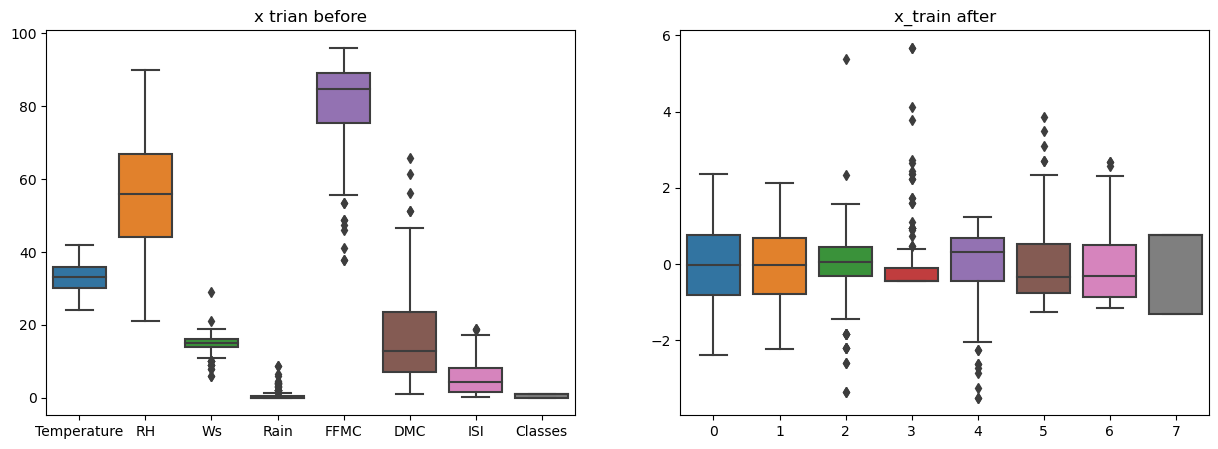

In [20]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x trian before')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after')

In [21]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
lr=LinearRegression()


Mean abs. error 0.697597044270322
r2 score 0.9845936047187036


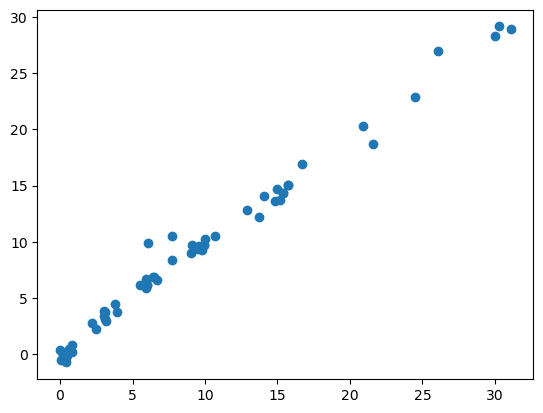

In [22]:
lr.fit(x_train_scaled,y_train)
y_preds=lr.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_preds)
score=r2_score(y_test,y_preds)
print('Mean abs. error',mae)
print('r2 score',score)
plt.scatter(y_test,y_preds)

Mean abs. error 1.2268152516595123
r2 score 0.9549199041084101


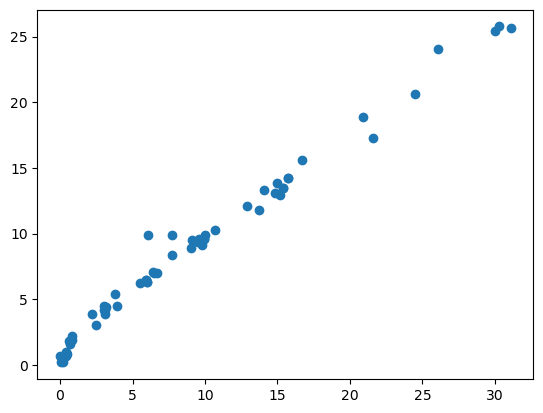

In [23]:
ls=Lasso()
ls.fit(x_train_scaled,y_train)
y_preds=ls.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_preds)
score=r2_score(y_test,y_preds)
print('Mean abs. error',mae)
print('r2 score',score)
plt.scatter(y_test,y_preds)

Mean abs. error 0.7149053421230228
r2 score 0.9839151682776311


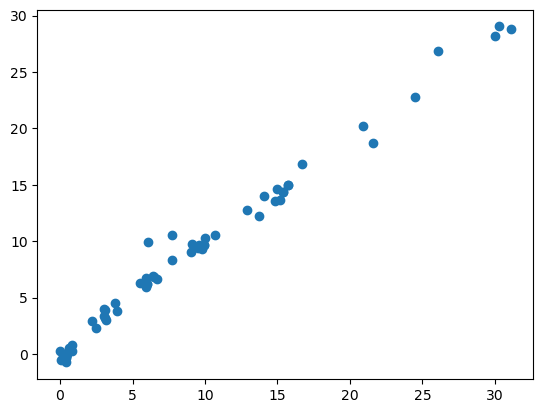

In [24]:
rr=Ridge()
rr.fit(x_train_scaled,y_train)
y_preds=rr.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_preds)
score=r2_score(y_test,y_preds)
print('Mean abs. error',mae)
print('r2 score',score)
plt.scatter(y_test,y_preds)

Mean abs. error 2.0677448245882433
r2 score 0.8818836918587609


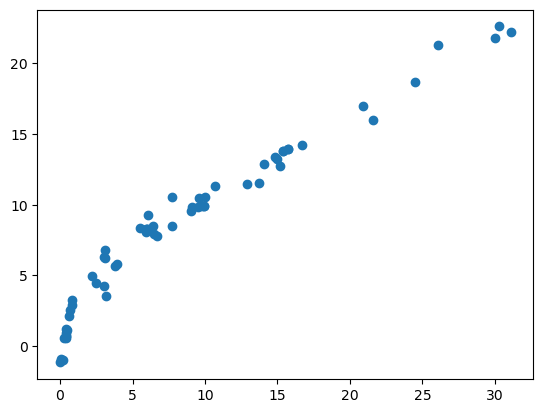

In [25]:
en=ElasticNet()
en.fit(x_train_scaled,y_train)
y_preds=en.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_preds)
score=r2_score(y_test,y_preds)
print('Mean abs. error',mae)
print('r2 score',score)
plt.scatter(y_test,y_preds)

In [27]:
import pickle

In [28]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rr,open('ridge.pkl','wb'))